# CMSC471 - Artificial Intelligence - Fall 2021 
## Instructor: Fereydoon Vafaei
# <font color="blue"> Assignment 5: Regression</font>

*Type your name and ID here*

## Overview and Learning Objectives

In your last assignment, you are going to do some Regression exercises.

<b>Note: </b>As you work through this assignment, you are recommended to check the textbook examples, notebooks and sklearn documentations.

<b>Course Policy Reminder:</b>
Debugging and error resolution are always students' responsbility. This policy will be enforced in email communications and the office hours. Keep in mind that all assignments are individual graded tasks. Any collaboration with other students is strictly prohibited and is considered as cheating. Students should NOT share any answer, solution, or code with other students. Violations of these policies would be penalized according to UMBC academic integrity policy.

**You must run ALL cells** and get the correct outputs for all cells and give complete answers to all questions. **Cells/codes with no output get zero!**

Pedagogically, this assignment will help you:
- better understand regression.

- practice with scikit-learn and its built-in methods, particularly regression models.

- practice data preprocessing.

- practice model evaluation using Regression performance metrics.

Wherever needed, you should replace `...` elipsis with your code.

`...` may indicate one or more lines of missing codes. Some outputs are provided to you to use as reference and to verify that your output is correct. Other outputs are NOT provided intentionally.

## Import Cell

The first step is importing all necessary python and sklearn modules. **You definitely need to add to the following imports as you work on the assignment.** When you import a new module, add it here in the same cell. All imports should be in this cell.

In [31]:
''' Import all the necessary modules from python and sklearn
You may start with pandas, numpy and matplotlib, and keep adding the necessary modules here as you move forward.
'''
import sys
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

## Part I - Regression with Scikit-Learn

First, download [the data](https://github.com/fereydoonvafaei/CMSC471-Fall-2021/blob/main/AI-Assignment-5-F21/SAheart.csv) and save it in your working directory. This is the same `SAheart.csv` dataset as in A4 but with a different target variable. You are going to build linear regression models to predict `adiposity` as a numeric value. 

> Next, load the data with pandas. The data (csv file) should be stored in the same working directory as your notebook.

In [3]:
heart_data =  pd.read_csv("SAheart.csv")

In [4]:
# Print the data shape and head
display(heart_data.shape)
display(heart_data.head(5))

(462, 11)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


### Preprocessing

> **Note:** Although preprocessing is extremely important to get the results of the following cells correctly, it has no points on itself because the dataset is the same as A4.

In [5]:
# The first column, row.names is useless for this ML task, drop it!
heart_data = heart_data.drop(["row.names"], axis=1)
display(heart_data.shape)
display(pd.DataFrame(heart_data, index=[0,1,2,3,4]))

(462, 10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [6]:
# Get the feature data types.
heart_data.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

> Next, you need to convert `famhist` from categorical (Present/Absent) to numeric {0,1} so that it can be used by the classifiers.

In [7]:
'''Convert 'famhist' from categorical (object type with Present/Absent values) to numeric {0,1} values
Hint: There are multiple ways to do this using pandas dataframe methods and/or sklearn methods. For instance,
you may use pd.Categorical and and then use .cat.codes to convert the values to [0,1]

Make sure your output looks exactly like the dataframe head below, i.e. famhist values are converted to {0,1}
'''
heart_data.famhist = pd.Categorical(heart_data.famhist)
heart_data.famhist = heart_data.famhist.cat.codes
display(heart_data.shape)
display(pd.DataFrame(heart_data, index=[0,1,2,3,4]))

(462, 10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [8]:
type(heart_data['famhist'][0])

numpy.int8

> You're going to predict `adiposity` based on all other features (including `chd`). So your target this time is `adiposity` NOT `chd`! 

In [9]:
# Create X, y 
# Notice that X should contain all the features (columns) except 'adiposity'
# y should only include 'adiposity' because it's the target variable!
X = heart_data.drop('adiposity', axis=1)
y = heart_data.adiposity

print(X.shape)
print(y.shape)

(462, 9)
(462,)


> Next, split the data with a test size of 0.3

In [16]:
# Split the data to train and test using train_test_split method with test_size=0.30
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.30)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(323, 9)
(323,)
(139, 9)
(139,)


### Linear Regression

> Next, build a [Linear Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

> Fit it on the training data, and get the $R^2$ score. $R^2$ is a measure for the quality of fit in linear regression models, and is computed as the fraction by which the variance of the errors is less than the variance of the dependent variable (target). `score()` method of the `LinearRegression` class is used to compute the $R^2$ score. Best possible $R^2$ score is 1.0. With no hyperparameter tuning, you should get an $R^2$ score higher than 0.75. **Note**: you may need to re-run the train/test split cell because some splits might be easier than others.

In [17]:
# [10 points]
# Create a Linear Regression Model
reg1 = LinearRegression()
# Fit reg1 on (X_train, y_train)
reg1.fit(X_train, y_train)

print("R^2 Score = ", reg1.score(X_train, y_train))

R^2 Score =  0.7776600127220864


> Next, create a Regularized Regression Model with l2, i.e. [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

In [18]:
# [5 points]
# Create a Ridge Regression Model 
reg2 = Ridge()
# Fit reg2 on (X_train, y_train)
reg2.fit(X_train, y_train)

print("R^2 Score = ", reg2.score(X_train, y_train))

R^2 Score =  0.7776594539955616


## Part II - Regression with Closed Form Solution

In this part, you review some of the concepts discussed in regression.

First, solve the following regression problem using closed form solution (normal equation). 

You're going to generate some data and then use closed-form solution for linear regression to fit the data.

Generate data points based on the following linear equation added by [the noise with “standard normal” distribution](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html). You may refer to the slides/textbook code snippets.

$$y = 5 + 6X + Gaussian Noise$$

In [19]:
X = 2 * np.random.rand(100, 1)

# Compute y based on the linear equation given above and add RANDOM GAUSSIAN noise
# Hint-1: Both the slides and the textbook have similar examples.
# Hint-2: You should NOT use rand() because it's unifrom distribution NOT Gaussian!
y = 5 + 6 * X + np.random.randn(100,1)

print(X[0])
print(y[0])

[0.35398073]
[7.14562866]


[0, 2.2, 0, 18]

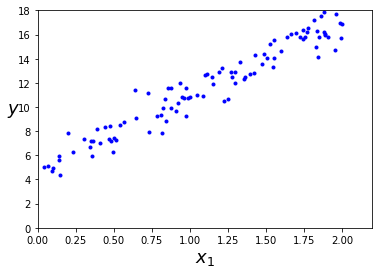

In [22]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2.2, 0, 18])

In [25]:
# add x0 = 1 to each instance using np.c_
X_b = np.c_[np.ones((100, 1)), X] 

# Compute theta_best using normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.83260734],
       [6.14349848]])

In [26]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [28]:
# Make predictions on new data by computing the dot product of X_new_b and theta_best
y_predict = X_new_b.dot(theta_best)

y_predict

array([[ 4.83260734],
       [17.11960431]])

[0, 2.2, 0, 18]

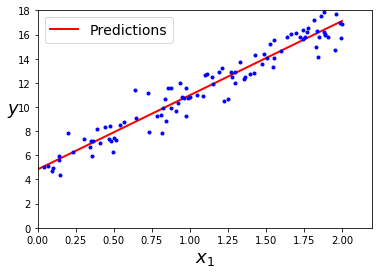

In [29]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2.2, 0, 18])

## Part III - Overfitting vs Underfitting

Next, run the following cell. Then answer the following **FOUR questions**.

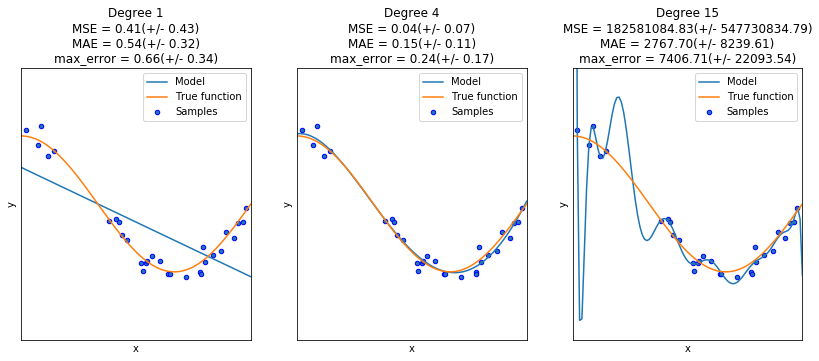

In [75]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using cross validation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    scores1 = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_absolute_error", cv=10)
    scores2 = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="max_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")

    plt.title("Degree {}\nMSE = {:.2f}(+/- {:.2f})".format(degrees[i], -scores.mean(), scores.std()) + "\n" +
             "MAE = {:.2f}(+/- {:.2f})".format( -scores1.mean(), scores1.std())+ "\n" +
             "max_error = {:.2f}(+/- {:.2f})".format( -scores2.mean(), scores2.std()))
    
    
    
    

Answer the following questions HERE:

**Q1 (5 points)** - How do you compare the three plots above in terms of their model complexity, bias and variance? Rank them in terms of complexity, bias and variance.

Answer Q1:

in terms of complexity, The model plot on the right has higher complextiy with a degree of 15. It has a bigger amount of fetures with degrees that go up to 15. The model ends up overfitting And the models plot is a more complex line that is able to pass through most of the points in the test data. 

Then the next model plot with the second highest complexity is the plot in the middle with a degree 4. This plot isnt overfitting as much as the degree 15 model and The plot line is more smother and doesn't bounce around like the degree 15. 

And finally the lowest complexity is the model with degree of 1 where its just a linear line and it ends up underfitting the data. And it fails to capture the pattern of the data.

In terms of bias, The Degree 1 model has the highest bias as it stays linear and is too simple of a model to accurately fit the data. And it fails to capture the pattern of the data.

The seconded highest bias is the degree 4 model. It is able to follow that data better then the degree 1 model and Its bias keeps it from overfitting the data too much like in the degree 15. 

The lowest bias model is the degree 15 model, where its low bias keeps the model unrestricted allowing it to overfit the data as you can see in its plot. It captures the patterns in the test data too accurately.

in terms of variance, the model wit the higest variance is the degree 15 model. Due to its higher degrees the model is not as restricted allowing higher spread in its predictions which allows it overfit the data as can been seen on it plot. 

The second model with the highest variance is the degree 4 model where its lower variance and higher bias restricts it a bit more than the degree 15 mdoel but is still able to follow the data fairly accurately.

The model with the least variance is the degree 1 mdoel, Due to its low varince restricts a lot and it stays as a linear line and doesn't follow the data all that well.

**Q2 (5 points)** - GIVE COMPLETE ANSWER to both part(a) and (b)<br> 

(a) Which plot has overfitting? Why? What causes overfitting (if overfitting occurs in any of the plots)?

Answer Q2 (a) [3 points] -

The degree 15 is over fitting Due its higher complexity it has a low bias and high variance. This means the model is not as restricted in its predictions and ends up matching the pattern of the test data too closely, Making this model overfit and wont be able to generalize its predictions as well. 


(b) Which one has underfitting? Why? What causes underfitting (if underfitting occurs in any of the plots)?<br>

Answer Q2 (b) [2 points] -

The degree 1 model is underfitting. due to it being linear it has a lower complexity and has a high bias with no variance. This means the model is unable to capture the pattern of the data and as a result is underfitting the data.  

**Q3 (5 points)** - How would you address overfitting or underfitting in each case (if there is any)? 

Answer Q3: 

For the degree 15 model it is overfitting, so to fix this we can lower the degrees as that would restrict the model more and lowers its variance and give it higher bias. as we see with the degree 4 model. 

The degree 1 modle is underfitting and to fix this we can increase its degree a bit more This will unrestrict the model a bit more as it would no longer be linear and give it some more variance and lower bias. And allow it to fit the pattern of the data more easly. We want to be carful not to make it too high of a degree like the model with degree 15 or else it will start to overfit.

The Degree 4 model is at a good middle ground its not underfitting nor is it over fitting too much like the other two models, so not much change is needed.

**Q4 (5 points)** - GIVE COMPLETE ANSWER to both parts (a) and (b)<br>
(a) What scoring has been used in applying `cross_val_score()` method on this regression model? Check [sklearn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values) and re-run the cell above with two other **Scoring** for **Regression**  as an argument in `cross_val_score()` method with no errors. **Note**: Not all scores work for this problem. You should choose the scoring that works error-free. 

Answer Q4 (a) [3 points]: 

neg_mean_squared_error (MSE) was used in the inital run of the cross validation.

I have added MAE and Max error scores to the title as well 


(b) You can see MSE shown above the plots. Would changing the scoring, as an argument in `cross_val_score`() method, increase or decrease the error shown above the plots? Why? GIVE COMPLETE ANSWER for BOTH of the two scoring you choose. Hint: You may have to change the format of the scores in `plt.title` so that you can compare them, for instance, from `.2e` to `.2f`.


Answer Q4 (b) [2 points]: 

It depends on how large the MSE error is. In the two scoring methods that i used, MAE and max_error. The scores for the degree 1 and degree 4 models increased and were higher than the MSE. This is because the MSE was a decimal that is -1 < x < 1 where x is the computed error for some instance. Since MSE squares its error values, the square of a decimal that is -1 < x < 1 would result in a smaller value than what MAE or max_error would calculate. 

In the degree 15 model, we see the opposent where MSE is larger than the MAE and Max error scores. This could be because the model is overfitting by a large amount and is unable to generalize and fit the pattern of the test data. making the error value large and greater than 1. that then squaring it would result in a larger value than what MAE or max_error would calculate. 

## Grading

Assignment 5 has a maximum of 50 points. Make sure that you get the correct outputs for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be nicely-formatted and easy-to-read.

The breakdown of the 50 points is as follows:

Part I implementaion has 20 points:
- reg1: 10 points
- reg2: 10 points

Part II implementation has 10 points - closed-form solution (normal equation).

Part III questions have 20 points (5 points each).

**Note:** Although preprocessing is extremely important to get the results of the following cells correctly, it has no points on itself because the dataset is the same as A4.

Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Grading will be based on 

  * correct implementation, correct results, correct answer to the questions, and
  * readability of the notebook.

## Submission

Name your notebook ```Lastname-A5.ipynb```. Submit the file using the ```Assignment-5``` link on Blackboard.
  
<font color=red><b>Due Date: Thursday December 9th, 11:59PM</b></font>